# MiniDataChallengeSteering 

In [86]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import sys
%matplotlib inline

In [87]:
from astropy.io import fits

In [88]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (20, 1.5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [89]:
from IPython.core.display import HTML
def css_styling():
    styles = open("styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

In [90]:
plt.rcParams.update({'figure.max_open_warning': 0}) # to see a large number of files

In [137]:
class redirect_output(object):
    """context manager for reditrecting stdout/err to files"""


    def __init__(self, stdout='', stderr=''):
        self.stdout = stdout
        self.stderr = stderr

    def __enter__(self):
        self.sys_stdout = sys.stdout
        self.sys_stderr = sys.stderr

        if self.stdout:
            sys.stdout = open(self.stdout, 'w')
        if self.stderr:
            if self.stderr == self.stdout:
                sys.stderr = sys.stdout
            else:
                sys.stderr = open(self.stderr, 'w')

    def __exit__(self, exc_type, exc_value, traceback):
        sys.stdout = self.sys_stdout
        sys.stderr = self.sys_stderr

# Initialisation

## Python Packages

In [91]:
PATH_LSSTFiltersKG='./LSSTFiltersKG'
PATH_ATMPARAMSIM='./atmparamsim'
PATH_ATMTRANSPSIM='./libradtransim'
PATH_CADENCE='./cadence'
PATH_LSSTPHOTO='./lsstphotometry'
PATH_SED='./pysynphotsed'

In [92]:
sys.path.append(PATH_LSSTFiltersKG)
sys.path.append(PATH_ATMPARAMSIM)
sys.path.append(PATH_ATMTRANSPSIM)
sys.path.append(PATH_CADENCE)
sys.path.append(PATH_LSSTPHOTO)
sys.path.append(PATH_SED)

In [93]:
import simuatmparam
import libsimulateTranspLSSTScattAbsAer as atmtranspsim

## Input file

In [94]:
cadence_file=os.path.join(PATH_CADENCE,'cadence_field1000.csv')

In [95]:
sed_file=os.path.join(PATH_SED,'sedgrid_phoenixmodels_good.fits')

In [96]:
df=pd.read_csv(cadence_file,index_col=False)

In [97]:
df1=df[['nights','filter']]

In [98]:
df.head()

,Unnamed: 0,nights,expdate,expmjd,airmass,filter
0,0,173,14965194,59753.208268,1.370996,g
1,1,173,14966692,59753.225609,1.274001,g
2,2,189,16353504,59769.276675,1.025141,z
3,3,189,16355480,59769.299544,1.012049,z
4,4,190,16439213,59770.268672,1.030291,y


In [99]:
max_nights=df1['nights'].max()

In [100]:
nbins=max_nights

In [101]:
nbins=df1.nights.max()-df1.nights.min()

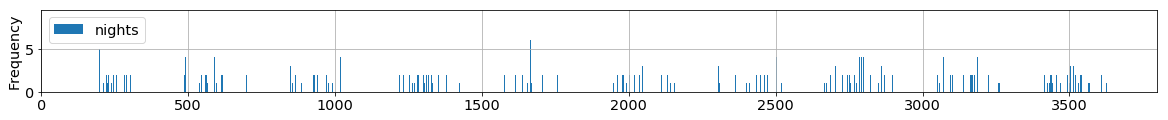

In [110]:
df1.plot.hist('nights',bins=nbins,grid=True,histtype='bar')

In [103]:
#plt.hist(df1['nights'],bins=nbins);

In [104]:
dfu=df1[df1['filter']=='u']
dfg=df1[df1['filter']=='g']
dfr=df1[df1['filter']=='r']
dfi=df1[df1['filter']=='i']
dfz=df1[df1['filter']=='z']
dfy=df1[df1['filter']=='y']

In [105]:
#len(dfu)

In [106]:
#print dfu['nights']

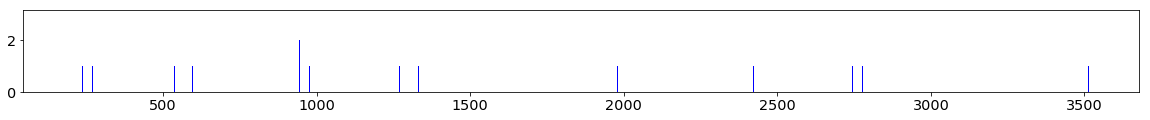

In [111]:
#plt.hist(dfu['nights'],bins=nbins,color='blue',lw=2,histtype='bar');

# See the sequence

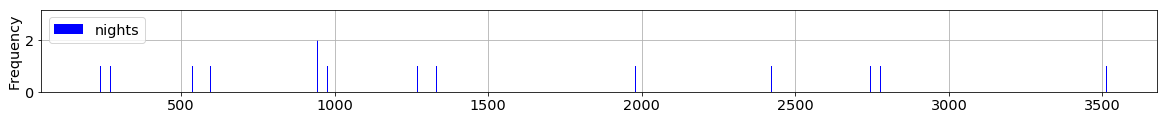

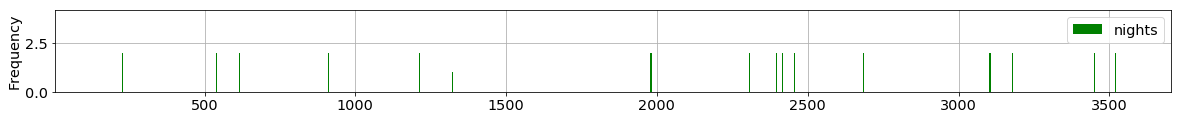

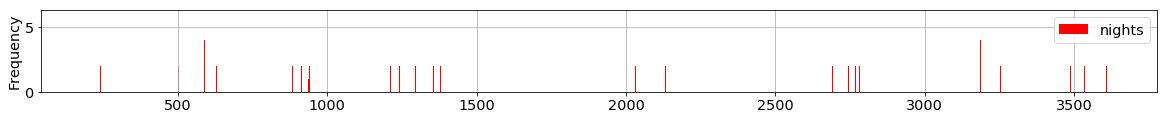

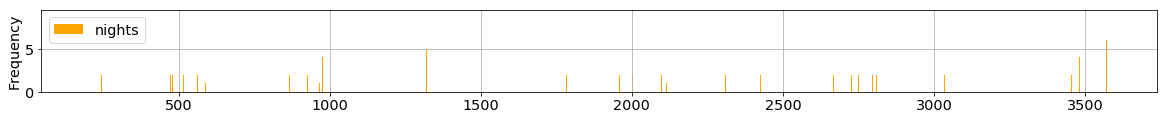

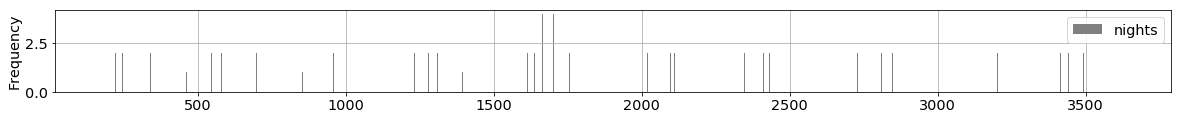

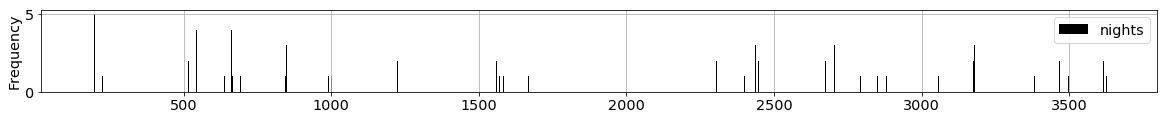

In [113]:
dfu.plot.hist('nights',bins=nbins,grid=True,color='blue',lw=3,histtype='bar',label='u')
dfg.plot.hist('nights',bins=nbins,grid=True,color='green',lw=3,histtype='bar',label='g')
dfr.plot.hist('nights',bins=nbins,grid=True,color='red',lw=3,histtype='bar',label='r')
dfi.plot.hist('nights',bins=nbins,grid=True,color='orange',lw=3,histtype='bar',label='i')
dfz.plot.hist('nights',bins=nbins,grid=True,color='grey',lw=3,histtype='bar',label='z')
dfy.plot.hist('nights',bins=nbins,grid=True,color='black',lw=3,histtype='bar',label='y')

# Access to atmospheric simulation parameters

In [158]:
%load_ext autoreload
%autoreload 1
%aimport simuatmparam

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [155]:
with redirect_output("my_output.txt"):   
    %run ./atmparamsim/simuatmparam.py -n 100 -a AOD 

In [159]:
#cat my_output.txt

In [160]:
VAOD=np.loadtxt('AOD.txt')

In [177]:
with redirect_output("my_output.txt"):   
    %run ./atmparamsim/simuatmparam.py -n 100 -a O3 

<Figure size 1440x108 with 0 Axes>

In [178]:
O3=np.loadtxt('TO3.txt')

In [170]:
with redirect_output("my_output.txt"):
    %run ./atmparamsim/simuatmparam.py -n 100 -a PWV 

In [167]:
PWV=np.loadtxt('TQV.txt') 

In [168]:
with redirect_output("my_output.txt"):
    %run ./atmparamsim/simuatmparam.py -n 100 -a CLOUDS

In [169]:
CLOUDS=np.loadtxt('TAUTOT.txt') 

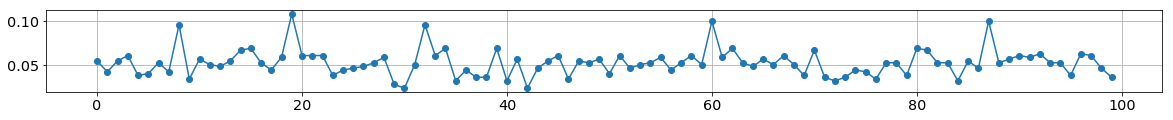

In [174]:
plt.plot(VAOD,'o-')
plt.grid()

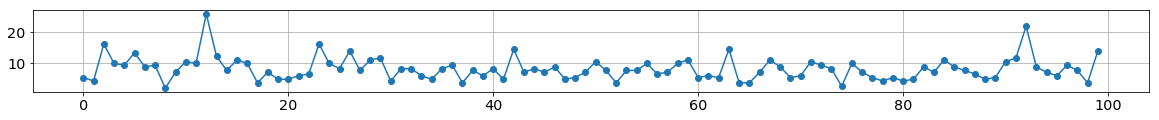

In [175]:
plt.plot(PWV,'o-')
plt.grid()

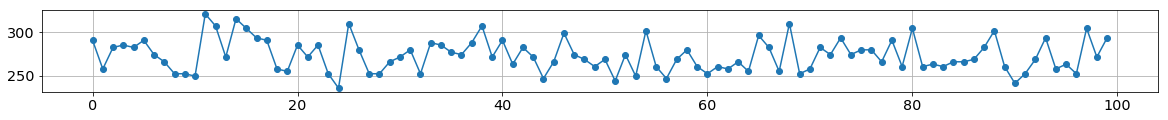

In [179]:
plt.plot(O3,'o-')
plt.grid()

(0.0, 100.0)

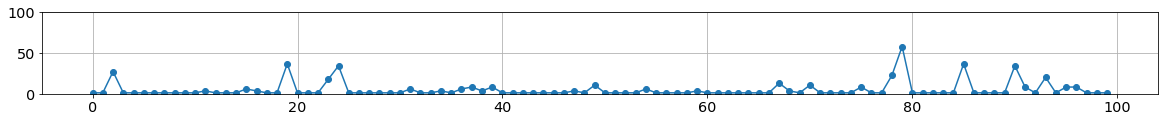

In [192]:
plt.plot(CLOUDS,'o-')
plt.grid()
plt.ylim(0.,100.)

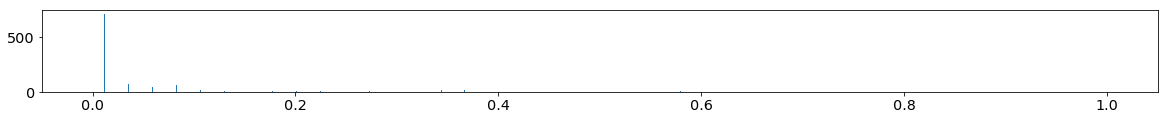

In [196]:
plt.hist(CLOUDS/100.,bins=1000,range=[0.,1.],density=True);

In [195]:
CLOUDS

array([  1.18333122,   1.18333122,  27.21631539,   1.18333122,
         1.18333122,   1.18333122,   1.18333122,   1.18333122,
         1.18333122,   1.18333122,   1.18333122,   3.54996614,
         1.18333122,   1.18333122,   1.18333122,   5.91660107,
         3.54996614,   1.18333122,   1.18333122,  36.68285509,
         1.18333122,   1.18333122,   1.18333122,  17.74977569,
        34.31622017,   1.18333122,   1.18333122,   1.18333122,
         1.18333122,   1.18333122,   1.18333122,   5.91660107,
         1.18333122,   1.18333122,   3.54996614,   1.18333122,
         5.91660107,   8.28323599,   3.54996614,   8.28323599,
         1.18333122,   1.18333122,   1.18333122,   1.18333122,
         1.18333122,   1.18333122,   1.18333122,   3.54996614,
         1.18333122,  10.64987092,   1.18333122,   1.18333122,
         1.18333122,   1.18333122,   5.91660107,   1.18333122,
         1.18333122,   1.18333122,   1.18333122,   3.54996614,
         1.18333122,   1.18333122,   1.18333122,   1.18